#ICP3

In [ ]:
#Import required libraries :
import pandas as pd

import nltk
from nltk import word_tokenize

nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
#get the Data used :
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [ ]:
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


##1)	Data cleaning and preprocessing



###Removing unnecessary columns or data

In [ ]:
#remove id column
Data = Data.drop("id", axis=1)

In [ ]:
Data

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


###Removing Twitter Handles( @user )

In [ ]:
#library for data cleaning
import re
import numpy as np



def remove_handle(text, pattern):
  # finds the pattern @ and put it in a list
  words = re.findall(pattern, text)

  for word in words:
    #remove @ and replace it with blank
    text = re.sub(word,"",text)

  return text


#make a new column named cleaned tweet
Data["Cleaned_Tweets"] = np.vectorize(remove_handle)(Data['tweet'], "@[\w]*")

#Remove tweet column
Data = Data.drop("tweet", axis=1)

In [ ]:
Data

,label,Cleaned_Tweets
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate isz that youuu?ððððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"#sikh #temple vandalised in in #calgary, #wso..."


###Removing punctuation, numbers, special characters

In [ ]:
#replace everything except characters. Series.str can be used to access the values of the series
Data["Cleaned_Tweets"] = Data["Cleaned_Tweets"].str.replace("[^a-zA-Z]", " ")

In [ ]:
Data

,label,Cleaned_Tweets
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for lyft credit i can t use cause th...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ...
4,0,factsguide society now motivation
...,...,...
31957,0,ate isz that youuu ...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,sikh temple vandalised in in calgary wso...


###Removing stop words

In [ ]:
#import stopword from nltk
from nltk.corpus import stopwords


In [ ]:

stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Series.apply Invoke function on values of Series and remove words in stopword
Data["Cleaned_Tweets"] = Data["Cleaned_Tweets"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords]))

In [ ]:
Data


,label,Cleaned_Tweets
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


###Tokenization, and Stemming

In [ ]:
#Tokenize the text by word
Data["Cleaned_Tweets"] = Data["Cleaned_Tweets"].apply(lambda x: word_tokenize(x))

In [ ]:
Data

,label,Cleaned_Tweets
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur]"
4,0,"[factsguide, society, motivation]"
...,...,...
31957,0,"[ate, isz, youuu]"
31958,0,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,0,"[listening, sad, songs, monday, morning, otw, ..."
31960,1,"[sikh, temple, vandalised, calgary, wso, conde..."


In [ ]:

#Import stemming library
from nltk.stem import PorterStemmer
porter = PorterStemmer()
#Stemming for each Series values
Data["Cleaned_Tweets"] = Data["Cleaned_Tweets"].apply(lambda x: [porter.stem(word) for word in x])



In [ ]:
Data

,label,Cleaned_Tweets
0,0,"[father, dysfunct, selfish, drag, kid, dysfunc..."
1,0,"[thank, lyft, credit, use, caus, offer, wheelc..."
2,0,"[bihday, majesti]"
3,0,"[model, love, u, take, u, time, ur]"
4,0,"[factsguid, societi, motiv]"
...,...,...
31957,0,"[ate, isz, youuu]"
31958,0,"[see, nina, turner, airwav, tri, wrap, mantl, ..."
31959,0,"[listen, sad, song, monday, morn, otw, work, sad]"
31960,1,"[sikh, templ, vandalis, calgari, wso, condemn,..."


#Visualization of postag(Using yellowbrick)

In [ ]:
# list for contain postagged words
tagged_words = []

#Pos tagging each word
for words in Data["Cleaned_Tweets"]:
  tagged_words.append(nltk.pos_tag(words)) 

#Change the form to use in yellowbrick
tagged_words = [tagged_words]

In [ ]:
pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.1)


In [ ]:
#library to visualizae postag
from yellowbrick.text import PosTagVisualizer


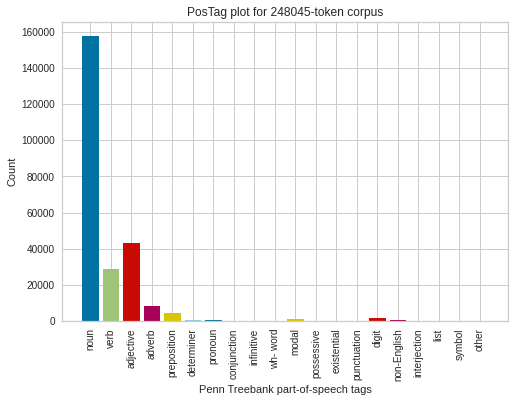

In [ ]:
# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer()
viz.fit(tagged_words)
viz.show()

##2)	Data Visualization and analysis for critical steps

In [ ]:

from nltk.probability import FreqDist
import matplotlib.pyplot as plt


In [ ]:
#Empty lists to store positive and negative words
positive_words  =[] 
negative_words = []

In [ ]:
#Classfy positive words from cleaned tweets
for word in Data["Cleaned_Tweets"][Data["label"]==0]:
  for w in word:
    positive_words.append(w)

In [ ]:
#Classfy negative words from cleaned tweets
for word in Data["Cleaned_Tweets"][Data["label"]==1]:
  for w in word:
    negative_words.append(w)

###Visualization using FreqDist

In [ ]:
fdist = FreqDist(positive_words)
positive_frequent = fdist.most_common(20)

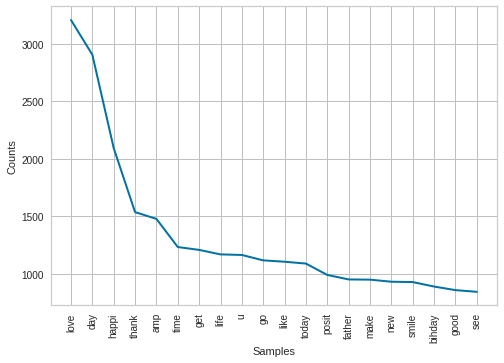

In [ ]:
#Visualize the most 20 frequennt word in positive tweet
fdist.plot(20)


In [ ]:
fdist2 = FreqDist(negative_words)
negative_frequent = fdist2.most_common(20)

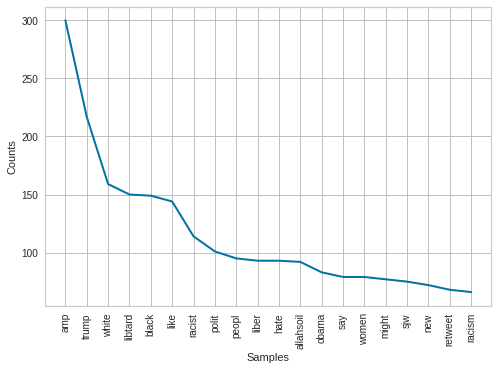

In [ ]:
#Visualize the most 20 frequennt word in negative tweet
fdist2.plot(20)

### Visualization using barplot

In [ ]:
#make dataframe for barplot
df_positive = pd.DataFrame(positive_frequent, columns=["Word", "Count"])
df_negative = pd.DataFrame(negative_frequent, columns=["Word", "Count"])

In [ ]:
#library for barplot
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


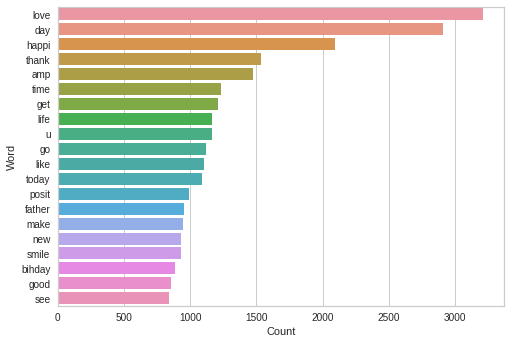

In [ ]:
#Positve words barplot
sns.barplot(data=df_positive, y="Word", x="Count")

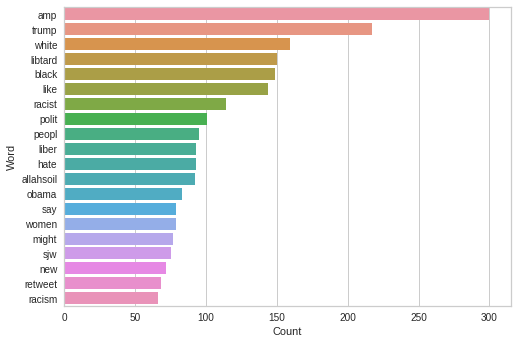

In [ ]:
#Negative words barplot
sns.barplot(data=df_negative, y="Word", x="Count")

### Visualization Using WordCloud

In [ ]:
#Library to make wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import requests

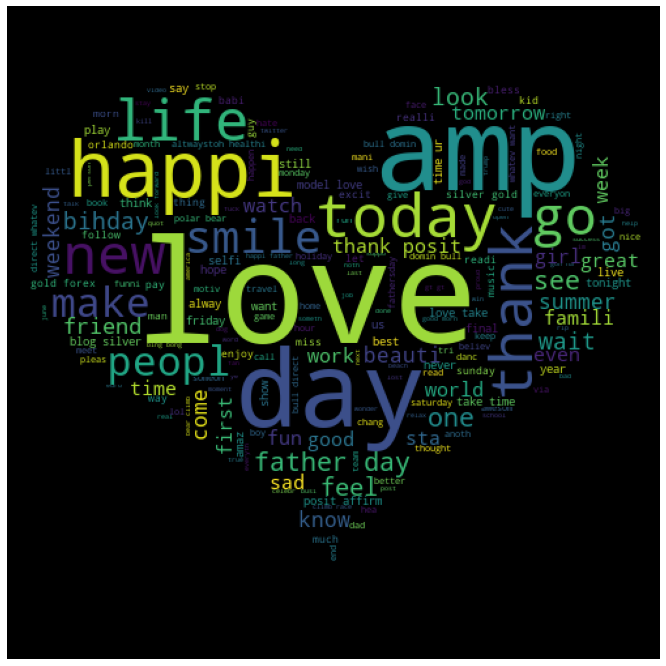

In [ ]:
Mask = np.array(Image.open(requests.get('https://res.cloudinary.com/practicaldev/image/fetch/s--sKgAlMeY--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://dev-to-uploads.s3.amazonaws.com/i/9fzqwxykz0ha9emyrjin.jpg', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
image_colors = ImageColorGenerator(Mask)

#Generating the wordcloud 
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(" ".join(positive_words))

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

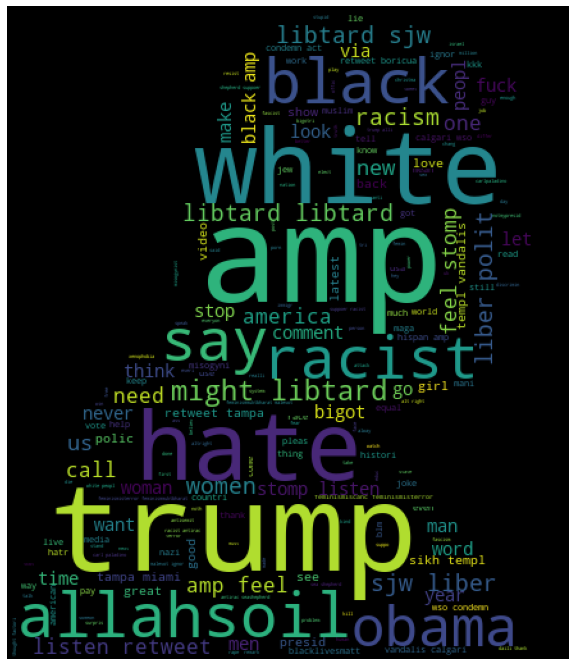

In [ ]:
#Change the mask
Mask = np.array(Image.open(requests.get('https://miro.medium.com/max/878/1*ALByHE3fv8xNfD1eTx12XQ.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)

#Generating the wordcloud with negative words
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(" ".join(negative_words))

#Plot the wordcloud 
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value 
plt.axis("off") 
plt.show()

###TFIDF vectors

In [ ]:
#Joining listed text to use in tfidf vector
Data["Cleaned_Tweets"] = Data["Cleaned_Tweets"].apply(lambda x: " ".join(x))

In [ ]:
#import required library
from sklearn.feature_extraction.text import TfidfVectorizer
#create an object
vectorizer = TfidfVectorizer(norm = None)

In [ ]:
#Generating output for TF_IDF
X = vectorizer.fit_transform(Data["Cleaned_Tweets"])


In [ ]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### train/test split of data

In [ ]:
from sklearn.model_selection import train_test_split
#target data for model
y = Data["label"]

In [ ]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3,random_state=15)#70% training and 30% test

## 3)	Model building and successfully executing the model to make prediction. 

###LogisticRegression

In [ ]:
#Import Log_Reg model
from sklearn.linear_model import LogisticRegression


In [ ]:
#Create a Log_Reg 
Log_Reg = LogisticRegression()

In [ ]:
#Train the model using the training sets
model1 = Log_Reg.fit(x_train,y_train)

In [ ]:
#Predict the response for test dataset
pred_y = model1.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
#Evaluation of model
print("For LogisticRegression")
print("Accuracy {}".format(accuracy_score(y_test, pred_y)))
print("Recall {}".format(recall_score(y_test, pred_y)))
print("f1_Score {}".format(f1_score(y_test, pred_y)))
print("Precision {}".format(precision_score(y_test, pred_y)))

For LogisticRegression
Accuracy 0.9551569506726457
Recall 0.5739130434782609
f1_Score 0.6481178396072013
Precision 0.7443609022556391


###Complement Naive Bayes

In [ ]:
#Import CNB model
from sklearn.naive_bayes import ComplementNB


In [ ]:
gnb = ComplementNB()

In [ ]:
model2 = gnb.fit(x_train ,y_train)

In [ ]:
pred_y = model2.predict(x_test)

In [ ]:
#Evaluation of model
print("For CNB model")
print("Accuracy {}".format(accuracy_score(y_test, pred_y)))
print("Recall {}".format(recall_score(y_test, pred_y)))
print("f1_Score {}".format(f1_score(y_test, pred_y)))
print("Precision {}".format(precision_score(y_test, pred_y)))

For CNB model
Accuracy 0.8093648972781312
Recall 0.8666666666666667
f1_Score 0.39550264550264547
Precision 0.25621251071122536


###DecisionTreeClassifier

In [ ]:
from sklearn import tree



In [ ]:
clf = tree.DecisionTreeClassifier()
model3 = clf.fit(x_train, y_train)


In [ ]:
pred_y = model3.predict(x_test)

In [ ]:
#Evaluation of model
print("For DecisionTreeClassifier")
print("Accuracy {}".format(accuracy_score(y_test, pred_y)))
print("Recall {}".format(recall_score(y_test, pred_y)))
print("f1_Score {}".format(f1_score(y_test, pred_y)))
print("Precision {}".format(precision_score(y_test, pred_y)))

For DecisionTreeClassifier
Accuracy 0.9529669412868912
Recall 0.5797101449275363
f1_Score 0.6394884092725819
Precision 0.7130124777183601
